# Prediciting Insurance Charges

Please see the read me file which contains more of a description about what we are trying to solve here for this quick project. 

We will approach the project with the following steps: 

1. Exploratory Data Analysis
2. Feature Engineering 
3. Feature Selection 
4. Modelling 
5. Project Outcome

# Load Packages and Data

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# load the data 
df = pd.read_csv('data/insurance.csv')
# drop the index column as it is not needed! 
df.drop(['index'], axis = 1, inplace=True)

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Some key points: 
- 7 actual columns, index was an identifier column and we droppped it
- sex, smoker and region are categorical so we will need to feature encode later on 
- The rest of the columns are numerical, we will look at their distribution later - if they are skewed we will need to apply a transformation 
- There are 1338 rows in our data

In [4]:
#view the data first 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Statistical Summaries 

This will help us in getting the 5 number summary of the numerical columns, helping us get a quick understanding of how some of the data is distributed

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Charges max value is very far from the 75% percentile, this is also the same for BMI, a BMi very far at 53 may be a cause for concern as that is extremely unhealthy! 

What else can we see from this summary? 
1. Age, BMI and Children are most likely symmetrically distributed (normal/Gaussian) due to them being placed approximately halfway between Q1 and Q3 
2. Charges has a median closer to the Q1 value so the data is most likely **right skewed** but we will investigate further 
3. Standard deviations from the mean for most column seem reasonable except charges, so most of the data isn't spread out across a large range of data a.k.a. not a lot of variability between observations

### Univariate Analysis 

Here we do some exploratory data analysis looking at singular columns only, this will help us better understand the data we have as a whole

In [7]:
df['age'].dtype == 'int64'

True

In [8]:
# create a function for plotting the univariate columns

def plot_hist_boxplot(data, feature_name): 
    
    """ To retun a boxplot and histogram of the univariate feature
    Parameters
    ----------
    data = your dataframe
    feature_name =  string of a numerical feature
    
    Returns
    ---------
    A Boxplot
    A Histogram
    
    """
    
    if data[feature_name].dtype in ('int64', 'float64'): 
        print("creating boxplot and histogram")
        fig, (ax1,ax2) = plt.subplots(2, figsize = (10,10),sharex =False, sharey = False)
        ax1.hist(df[feature_name])
        ax1.set_title(label = f"Histogram of {feature_name}")
        ax2.boxplot(df[feature_name],vert=False)
        ax2.set_title(label = f"Boxplot of {feature_name}")
    
    return plt.show();
        
    

creating boxplot and histogram


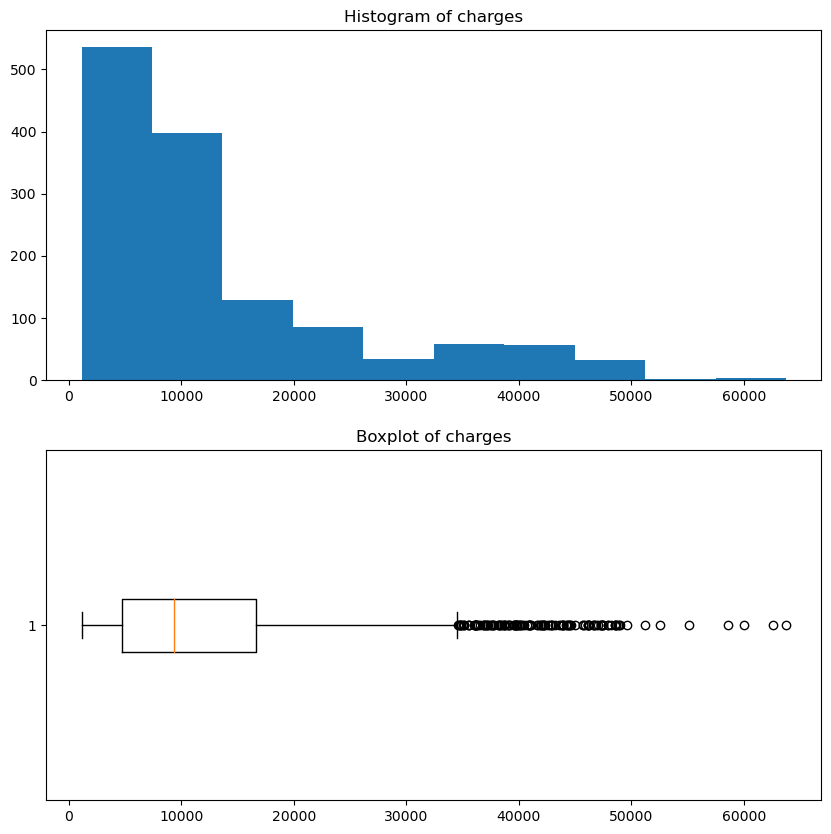

In [9]:
plot_hist_boxplot(df, 'charges')

Immediately we can see that the data is right skewed for charges - although we won't be making a transformation of the target variable because we are using a multiple linear regression model. 

One thing to note is that the high values of 60K might not be outliers! We could leave them in or remove them later on dependent on how we feel - before transformation, if we transform whilst the outliers are there they will still remain as outliers! Bivariate analysis may help in understanding these more though!

Quite a large amount of ages that are under 25, not neccessarily left or right skewed and a few modals popping up here and there - mostly a flat distribution

creating boxplot and histogram


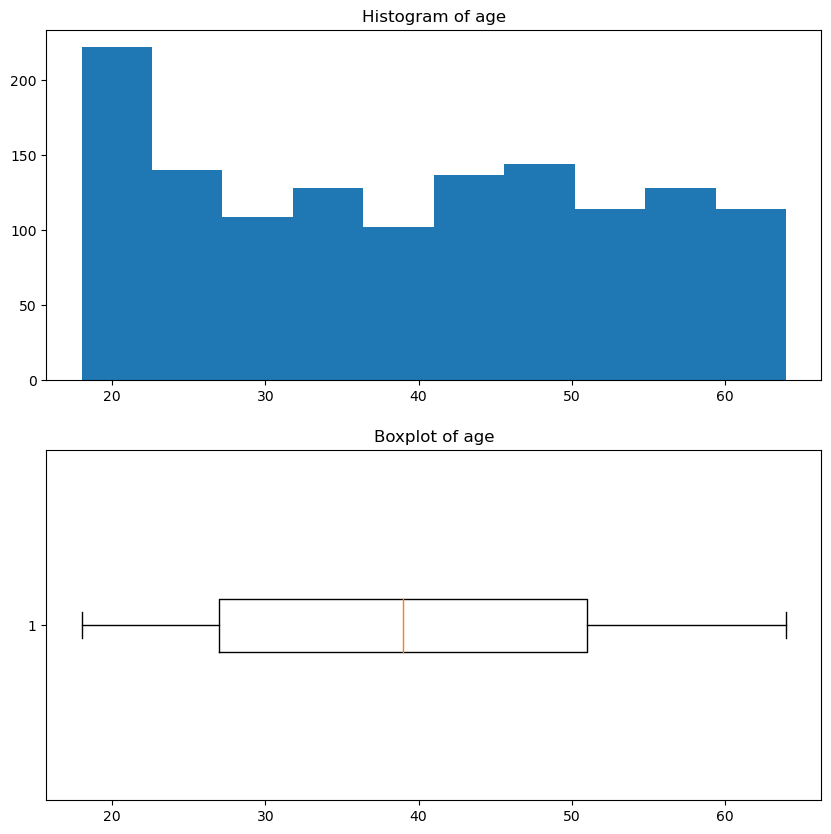

In [10]:
plot_hist_boxplot(df, 'age')

Data does not look skewed inherently but there are quite a lot of data points located at ages < 25

creating boxplot and histogram


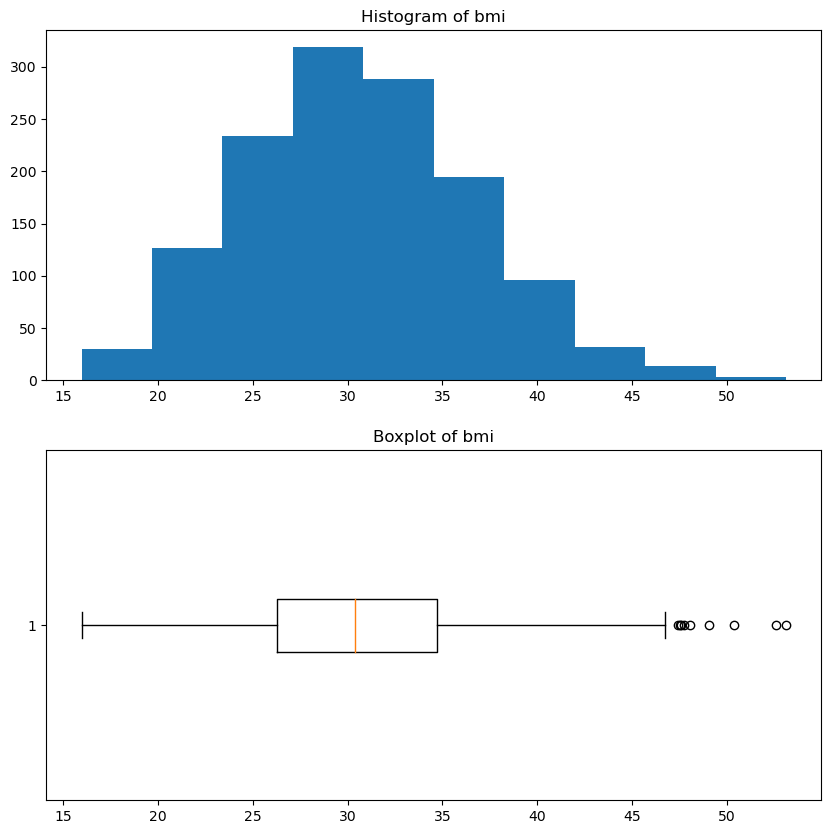

In [11]:
plot_hist_boxplot(df, 'bmi')

Data looks fairly normally distributed, however there are some outliers that may need to be dealt with

creating boxplot and histogram


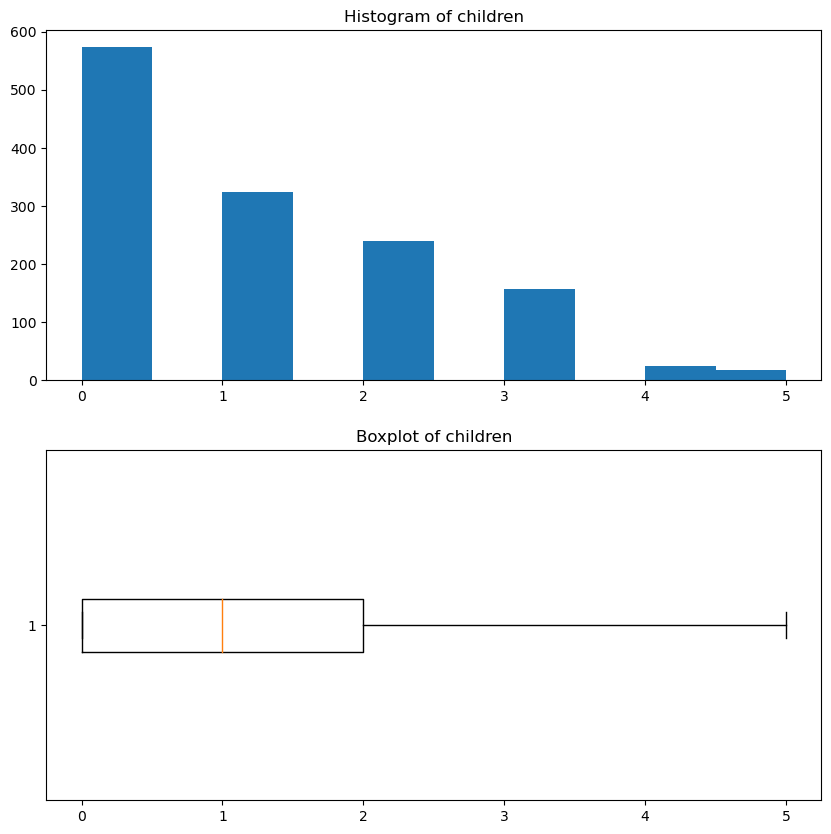

In [12]:
plot_hist_boxplot(df, 'children')

Although the data is continous, it appears that the data is binned because of children only taking whole values, it is right skewed though given that we see more people with 0 children, we could transform this but it might not be worth it!

### Categorical Feature Analysis

Checking into the only 3 categorical features, which are: 
1. sex
2. region 
3. smoker

In [13]:
def plot_categorical(df, feature): 
    """Plot the categorical features"""
    df_temp = df[feature].value_counts().to_frame('counts').reset_index()
    fig, ax = plt.subplots(figsize = (5,5))
    ax.bar(df_temp['index'], df_temp['counts'])
    ax.set_title(f"Plot of {feature}")
    
    return plt.show();


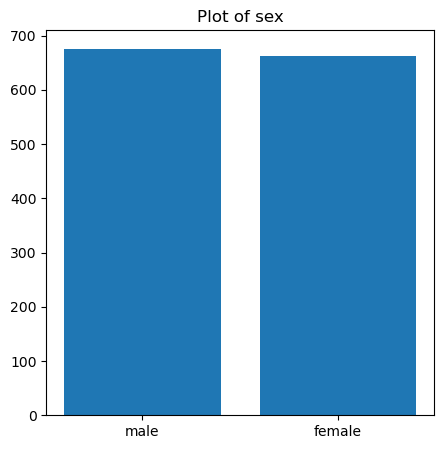

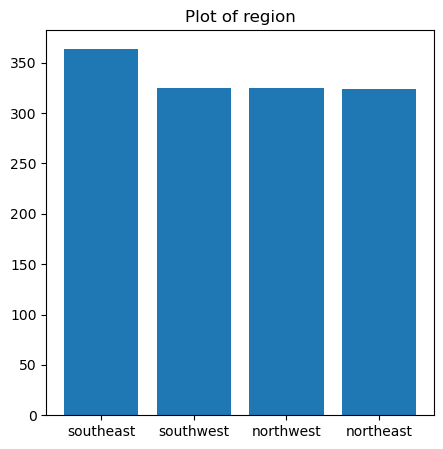

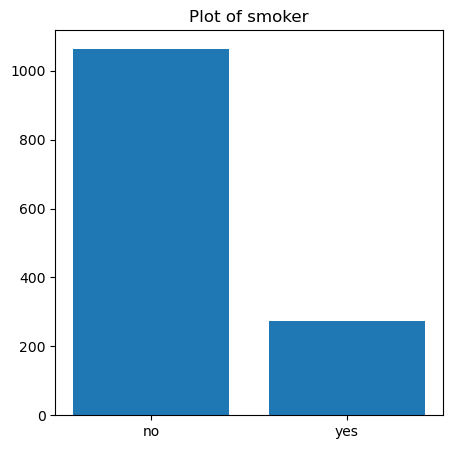

In [14]:
plot_categorical(df, 'sex')
plot_categorical(df, 'region')
plot_categorical(df, 'smoker')

things seem to be balanced for the male and female and regions features - just slightly more for the southeast, however smokers seem to be imbalanced, this could mean some useful things for our charges - maybe non smokers are charged less?

# Bivariate Analysis 

Here we will have a look at some of the columns against each other to gain some further insights into the data

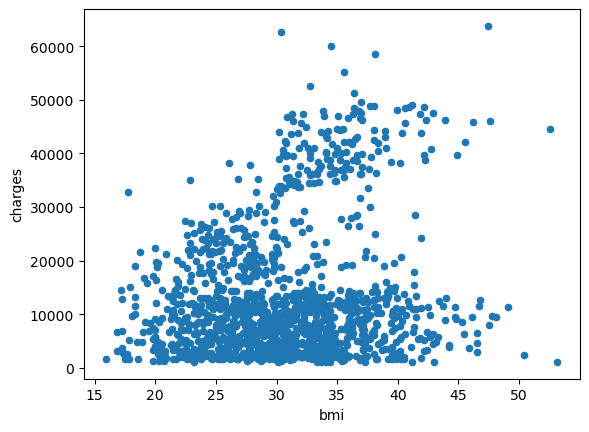

In [15]:
# let's have a look at the charges vs smoker information first: 
df.plot.scatter(x = 'bmi', y='charges');

There doesn't seem to be a distinctive pattern here, but maybe we can split out by the data by smoker status

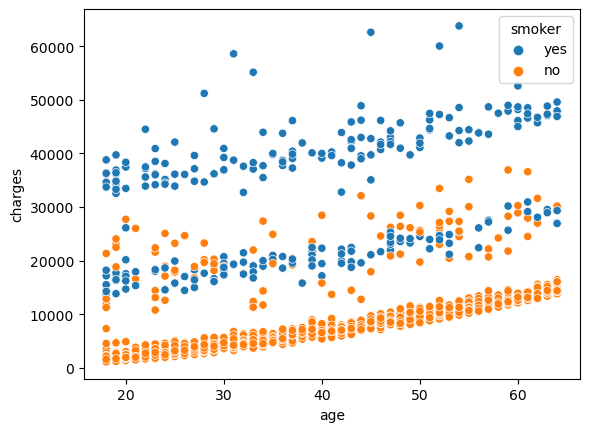

In [16]:
sns.scatterplot(df, x = 'age', y = 'charges', hue = 'smoker');

There seems to be lower charges for those who are non smokers! this is quite a useful bit of analysis, we already had an intiution that people who did not smoke paid less in charges!

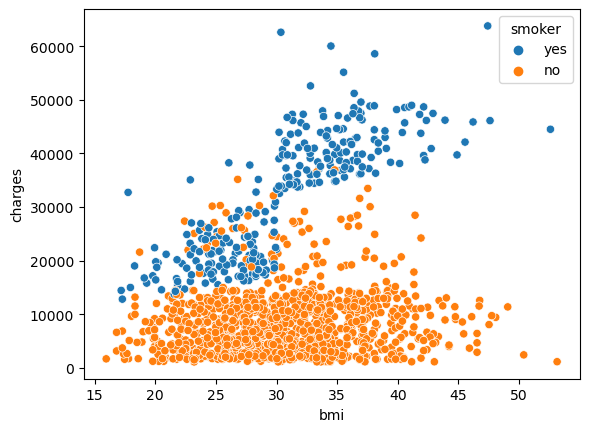

In [17]:
sns.scatterplot(df, x = 'bmi', y = 'charges', hue = 'smoker');

BMI might actually be a slightly different story - this is because we 
can see that as BMI increases, there seems to be a steady rate of increase in the charges - but then again there are those who smoke and it follows a linear trend! 

So in essence as if they SMOKE and their BMI increases so does the charge, although BMI is height/waist, smoking affects internal issues, height is not one of them, but waist size is!

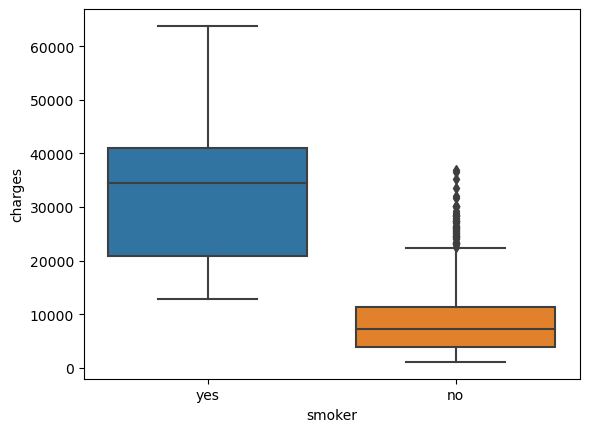

In [18]:
sns.boxplot(data=df, x= 'smoker', y = 'charges' );

For smokers and charges, its becoming more evident that those who smoke have more charges, those who don't have a few outliers though

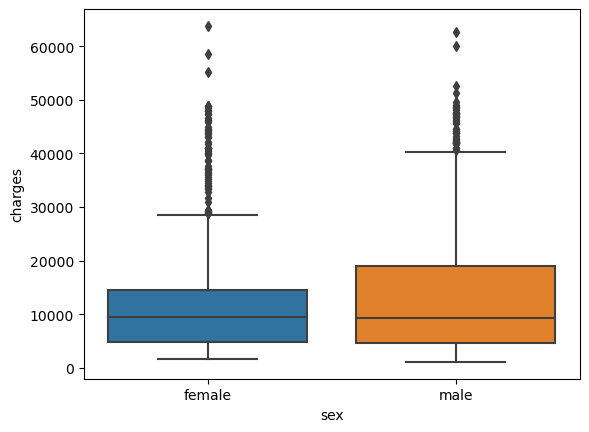

In [19]:
sns.boxplot(data=df, x= 'sex', y = 'charges' );

Seems to be fairly reasonably split for female and male, although there are some females exhibiting charges that could be potential outliers - this might be because of something else in the data e.g. smoking or age!

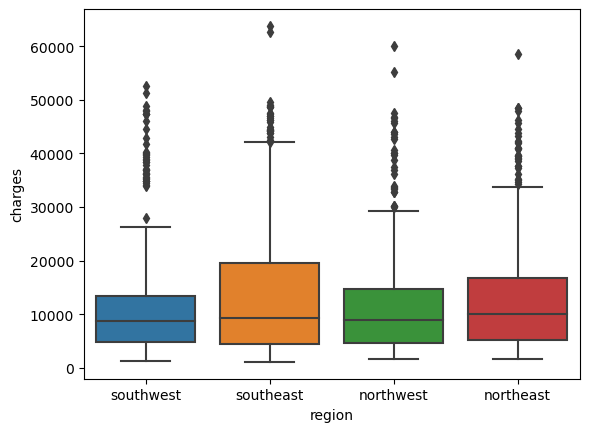

In [20]:
sns.boxplot(data=df, x= 'region', y = 'charges' );

There isn't really that much to mention about charges across regions except a few outliers here and there and that the southeast seems to have the biggest spread of the data, this is also the largest group in the data!

Let's quickly check some correlations in our entire dataframe to just see how things are going!

<AxesSubplot: >

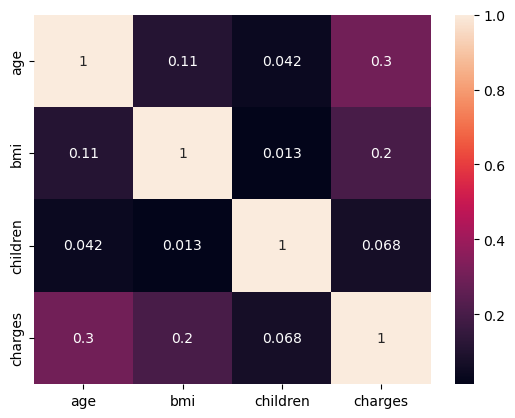

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Appears the following this: 
1. slight correlation with age and charges, we do know that when age increases so does charges same with BMI 
2. weakest correlation is with children - could be non linear relationship check quickly?

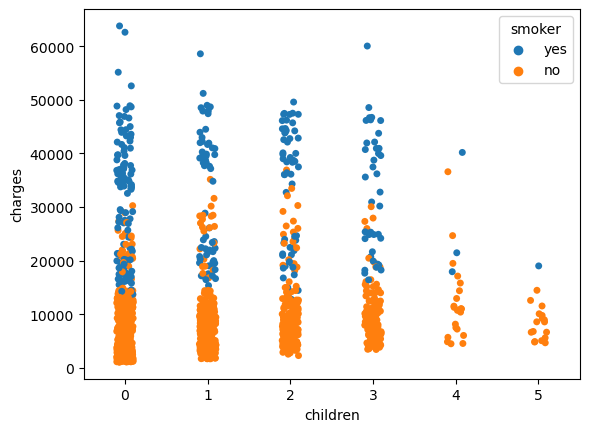

In [22]:
sns.stripplot(df, x = 'children', y = 'charges', hue = 'smoker');


We can see that non smokers with children pay less! 

# Feature Engineering

We will now start with feature engineering the data for modelling. 

We will do the following things first: 

0. Splitting data into Train & Test split
1. Handle missing values 
2. Handle Outliers
3. Feature Transformation if skewed and model requires it 
4. Feature Encoding 
5. Feature Scaling


Although Exploratory data analysis was not performed on the training set, we usually do! Things like correlations etc should be done on the training set - but for this quick example we have chosen not to due to the project only being a trivial output of applied skills!

**There are no missing values**

**Values which are outliers are not singularly occuring so we can leave them for now**

**Feature Transformation doesn't really need to be done here

# Split data into Train and Test Split


In [23]:
from sklearn.model_selection import train_test_split
# set random seed
np.random.seed(42)

X = df.drop('charges', axis = 1)
y = df['charges']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 6), (402, 6), (936,), (402,))

# Feature Encoding & Feature Scaling

## Feature Encoding 

We will now encode the categorical features into one hot encoded variables, this is so that our model can effectively interpret the values. 

This will be done on the following columns: 
1. sex 
2. smoker 
3. region

We will try out some linear modelling techniques like linear regression and regularized models - but because of this we will not drop the first first value in our hone hot econding or dummy variables to avoid singularity issues, because for two reasons: 

1) Sklearn has a fit_intercept argument which we can set to False to avoid this issue
2) Regularized models benefit from having an intercept fitted during the model building phase as they penalize the entire model coefficients including the intercept!

## Feature Scaling

We will also perform feature scaling on the following columns: 

1. age
2. bmi
3. children 

We don't actually have to perform feature scaling on these values because there isn't really a large amount of differences in terms of scales, but for brevity and completeness since we usually do it for every other project as data is wildly different we'll do it here anyway!

It wont affect the distributions of the data, only the scale to which they sit on, so outliers will remain outliers and right skewed data will remain right skewed! 

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [60]:
# categorical columns 
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi','children' ]
# create the instances 
one_hot = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
# create column transformer 
col_transformer = ColumnTransformer(
[('one_hot', one_hot, cat_features), 
('scaler', scaler, num_features)], 
remainder="passthrough", 
verbose_feature_names_out=False)

In [61]:
# fit the transformer to the training data only! 
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region']),
                                ('scaler', StandardScaler(),
                                 ['age', 'bmi', 'children'])],
                  verbose_feature_names_out=False)

In [62]:
# transform the data for X_train and X_test
X_train_new = col_transformer.transform(X_train)
X_test_new = col_transformer.transform(X_test)

In [64]:
# check the shape of the dataframes
X_train_new.shape, X_test_new.shape
# these match but we need to get them into a nice dataframe format!

((936, 11), (402, 11))

In [66]:
X_train_new = pd.DataFrame(X_train_new, columns=col_transformer.get_feature_names_out())
X_test_new = pd.DataFrame(X_test_new, columns = col_transformer.get_feature_names_out())

In [67]:
# check the training head and test head for a quick sanity check 
X_train_new.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.544465,0.103182,-0.915011
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.481874,-0.490845,-0.915011
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.048589,0.226660,1.560279
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.119429,0.023923,-0.915011
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.005753,2.502650,0.735182


In [68]:
X_test_new.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.411035,-0.895484,0.735182
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.226519,-0.087040,-0.915011
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.756983,-0.610150,-0.915011
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.481874,-0.800372,1.560279
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.430789,0.229997,-0.915011


# Modelling

We will now create some predictive machine learning models! But first we need to decide upon an evaluation metric, this is usually confirmed with the problem statement/business - but in our case, we will look at RMSE and MAE, given they are the most commonly sighted metrics for regression and interpret those. 

We will try the following techniques: 

1. Linear Regression (no intercept) 
2. Lasso Regression (+ hyperparamter tuning) 
3. Ridge Regression (+ hyperparamter tuning) 

Even though Regularized models seem a bit extreme here as we have a few features anyway, it would be good to see what outputs we get and if a penalized model is worth it on such a small dataset to avoid overfitting! 

It might not yield any meaningful results - but would be good to demonstrate hyperparameter tuning using both GridSearchCV and RandomizedSearchCV!

We will will also look into feature importance in terms of coefficients and explainability of the models. 

Our evaluation metrics will be: 

1. RMSE 
2. MAE 

We will pick the model with the lowest RMSE and MAE, mean and standard deviation using cross validation! 

In [69]:
# models (estimators)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
# evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
# hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [119]:
def create_score_model(training_df, training_labels, test_df, test_labels): 
    """create following models: 
    linear_regression 
    ridge regression 
    lasso regression
    
    Parameters
    -----
    training_df - your training dataframe
    test_df - your test dataframe for making predictions and evaluation 
    
    Returns 
    -------
    list object containing the models  - so we can access attribtues
    dataframe containing the model name, its scores for both MAE and RMSE and residuals
    """
    
    returned_models = []
    
    # create the models
    lin_reg = LinearRegression(fit_intercept=False)
    ridge_reg = Ridge()
    lasso_reg = Lasso()
    
    models = [lin_reg, ridge_reg, lasso_reg]
    
   
    # make predictions on the models with test data: 
    
    predictions_dict = {}
    
    for model in models: 
        model.fit(training_df, training_labels)
        preds = model.predict(test_df)
        predictions_dict[str(model)] = preds
        
    
    # create the scores dictionary: 
    
    scores_dict = {}
    
    for model, predictions in predictions_dict.items(): 
        # create evaluation metrics
        rmse = np.sqrt(mean_squared_error(test_labels, predictions))
        mae = mean_absolute_error(test_labels, predictions)
        # append to dictionary
        scores_dict[model] = {'RMSE': rmse, 'mae': mae}
        
    # return model list, prediction, scores dictionary
    return models, predictions_dict, scores_dict
        
    
    
        
        
    
    
    
    

In [125]:
models, predictions, scores = create_score_model(training_df=X_train_new, 
                   training_labels=y_train, 
                   test_df = X_test_new, 
                   test_labels = y_test)

In [126]:
models

[LinearRegression(fit_intercept=False), Ridge(), Lasso()]

In [127]:
predictions

{'LinearRegression(fit_intercept=False)': array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
         2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
         9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
         4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
         1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
         3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
         1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
         1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
         4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
         1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
         3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
         8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
         3.54465532e+04,  9.10285846e+03,  1.57

In [138]:
scores_df= pd.DataFrame.from_dict(scores, orient='index')
scores_df

,RMSE,mae
LinearRegression(fit_intercept=False),5812.100272,4145.450556
Ridge(),5813.470978,4151.406408
Lasso(),5812.187707,4145.756040


Let us plot these scores to get some good understanding of them!

<AxesSubplot: >

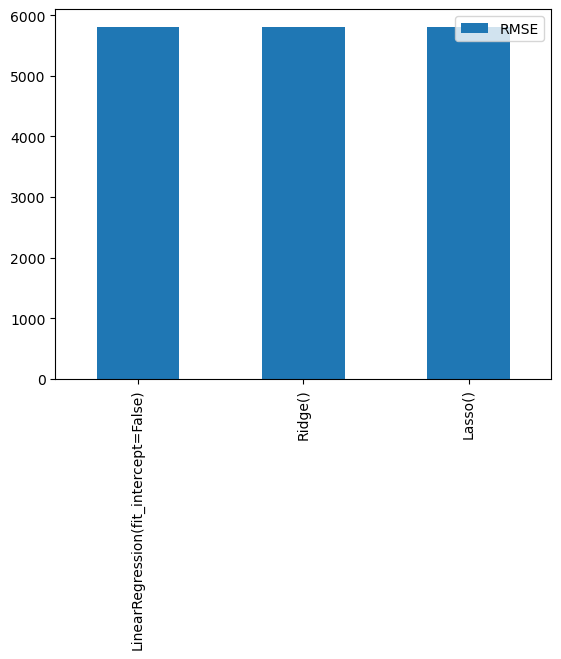

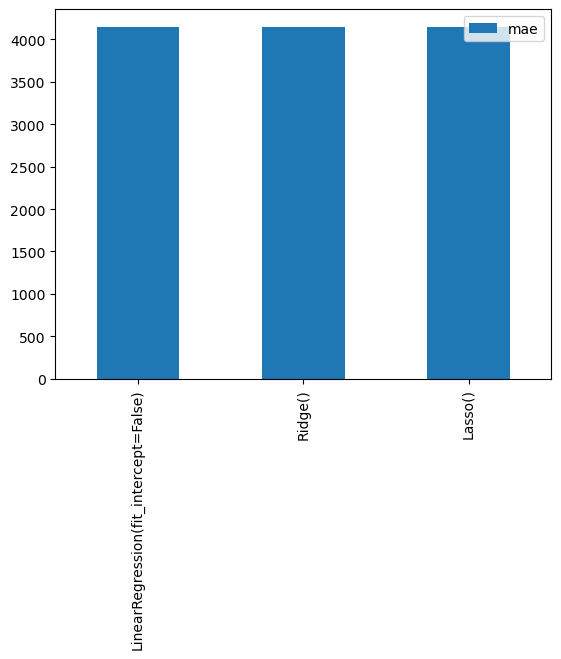

In [143]:
scores_df[['RMSE']].plot(kind = "bar"); 
scores_df[['mae']].plot(kind = "bar")

Hardly any difference amongst the models - but what did we expect, we have a really small dataframe with so few features! 

Overall we can see from just an evaluation analysis, that Linear regression seems to be performing better than the Ridge and Lasso Models! 

but this is on one training split, which might be biased, so let's see how well out models do with a cross validated score!

Interestingly lets have a quick look at the Lasso coefficients, they might have something to say about the data - maybe one of the features coefficients has been shrunk!

In [166]:
lasso_df = pd.DataFrame(models[2].coef_, index=models[2].feature_names_in_.tolist())

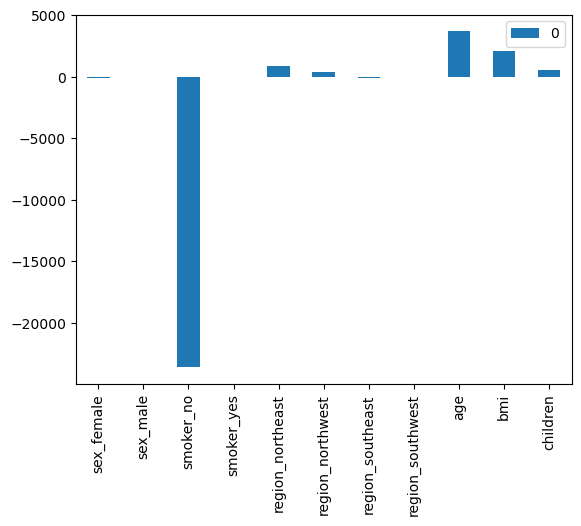

In [169]:
lasso_df.plot(kind = "bar");

In [170]:
lasso_df

,0
sex_female,-1.015315e+02
sex_male,1.711286e-13
smoker_no,-2.362217e+04
smoker_yes,0.000000e+00
region_northeast,8.661700e+02
region_northwest,3.790606e+02
region_southeast,-9.579536e+01
region_southwest,-5.161866e+01
age,3.687734e+03
bmi,2.088971e+03


Appers that smoker_yes was shrunken completely to 0 - this value was obviously more influential to our model, the coefficient must have been high, we can check it for linear regression model or ridge - but save that for later!

In [99]:
empty_dict = {}

for model in models: 
    model.fit(X_train_new, y_train)
    predz = model.predict(X_test_new)
    empty_dict[str(model)] = predz

In [102]:
empty_dict.keys()

dict_keys(['LinearRegression()', 'Lasso()'])

In [114]:
scores_dict = {}

In [115]:
for key, value in empty_dict.items():
    rmse = np.sqrt(mean_squared_error(y_test, value))
    mae = mean_absolute_error(y_test, value)
    scores_dict[key] = {'rmse': rmse, 'mae': mae}

In [116]:
scores_dict

{'LinearRegression()': {'rmse': 5812.100272258872, 'mae': 4145.450555627598},
 'Lasso()': {'rmse': 5812.187707002118, 'mae': 4145.756039614657}}

# Cross Validation of Models

we will be using cross_val_score function to check how well our models are performing across RMSE and MAE

In [172]:
models

[LinearRegression(fit_intercept=False), Ridge(), Lasso()]

In [189]:
cross_val_models = {'lin_reg': LinearRegression(),
'lasso' : Lasso(),
'ridge' : Ridge()}


In [202]:
for key, value in cross_val_models.items():
    cross_val_MAE= cross_val_score(value, X_train_new, y_train, cv = 5, scoring="neg_mean_absolute_error")
    cross_val_RMSE = cross_val_score(value, X_train_new, y_train, cv = 5, scoring="neg_mean_squared_error")
    print(f"""{key} has a cross validation score\n 
    MAE mean = {np.mean(cross_val_MAE)}
    MAE std = {np.std(cross_val_MAE)}
    RMSE mean = {np.mean(cross_val_RMSE)}
    RMSE std = {np.std(cross_val_RMSE)}""")
    
    
    


lin_reg has a cross validation score
 
    MAE mean = -4246.845525829873
    MAE std = 205.2178690215683
    RMSE mean = -38572262.26051885
    RMSE std = 3121490.6408712002
lasso has a cross validation score
 
    MAE mean = -4299.900071313704
    MAE std = 182.13664762590727
    RMSE mean = -38545506.81319313
    RMSE std = 3180254.6499219374
ridge has a cross validation score
 
    MAE mean = -4306.024386667307
    MAE std = 180.8003206519065
    RMSE mean = -38546551.31304638
    RMSE std = 3120751.687263866


Appears that the following is given: 

1. MAE is lowest for Lin Reg
2. RMSE is lowest for Lasso 
3. Ridge has some of the best STD scores

# Hyperparameter Tuning 

This is just done for a quick check of where hyperparameter tuning might lead us - its not really applicable to this project anyway! But it would be good to see if we can find some nice paramters for regularization anyway! 